# Activity 2

## How to Detect and Remove Outliers

### Step-1: Importing Necessary Dependencies and load the dataset

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [6]:
df_boston = pd.read_csv('Airdata.csv')

### Step-2: Show a preview of the dataset

In [9]:
df_boston.head()

,DateTime,Temperature,Humidity,Wind_Speed,Wind_Direction,NO2_Location_A,NO2_Location_B,NO2_Location_C
0,1/1/2020 0:00,2.180529,87,1.484318,75.963760,39.23,52.88,62.37
1,1/1/2020 1:00,1.490529,89,2.741678,113.198590,38.30,44.95,52.53
2,1/1/2020 2:00,1.690529,85,3.563818,135.000000,NaN,48.40,54.80
3,1/1/2020 3:00,1.430529,84,2.811690,129.805570,37.28,47.18,50.80
4,1/1/2020 4:00,0.840529,86,1.800000,126.869896,29.97,41.48,54.43


### Step-3: Generate a Box-plot for the NO2_Location_A feature

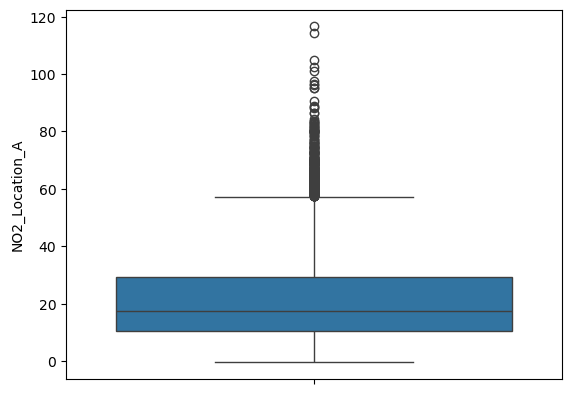

In [12]:
sns.boxplot(df_boston['NO2_Location_A'])
plt.show()

### Step-4: Finding the IQR

In [15]:
percentile25 = df_boston['NO2_Location_A'].quantile(0.25)
percentile75 = df_boston['NO2_Location_A'].quantile(0.75)

In [17]:
iqr = percentile75-percentile25

### Step-5: Finding upper and lower limit

In [20]:
upper_limit = percentile75 + (1.5 * iqr)
lower_limit = percentile25 - (1.5 * iqr)

### Step-6: Capping

In [23]:
new_df_cap = df_boston.copy()
new_df_cap['NO2_Location_A'] = np.where(
    new_df_cap['NO2_Location_A'] >= upper_limit, upper_limit,
    np.where(new_df_cap['NO2_Location_A'] <= lower_limit, lower_limit,
        new_df_cap['NO2_Location_A']
    )
)

### Step-7: Draw boxplot after capping

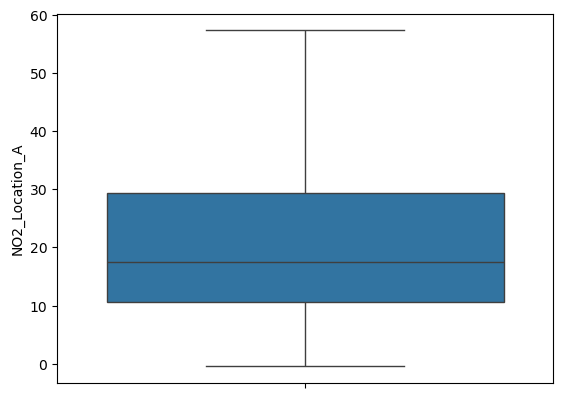

In [26]:
sns.boxplot(new_df_cap['NO2_Location_A'])
plt.show()